In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = pd.read_csv('./resources/nyc-rolling-sales.csv')
dataset.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# removing unnecessary columns 
dataset.drop(['Unnamed: 0','ADDRESS','EASE-MENT','APARTMENT NUMBER','SALE DATE','NEIGHBORHOOD','BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE'],inplace=True, axis=1)
dataset.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633,6440,1900,2,6625000
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616,18690,1900,2,-
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212,7803,1900,2,-
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272,6794,1913,2,3936272
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369,4615,1900,2,8000000


In [5]:
# dropping the duplicate values from the dataset
dataset.drop_duplicates(keep=False, inplace = True)
dataset.duplicated(keep=False).sum()

0

In [7]:
# convert the varaible to different types
dataset['BUILDING CLASS CATEGORY'] = dataset['BUILDING CLASS CATEGORY'].astype('category')
dataset['TAX CLASS AT PRESENT'] = dataset['TAX CLASS AT PRESENT'].astype('category')
dataset['LAND SQUARE FEET'] = pd.to_numeric(dataset['LAND SQUARE FEET'], errors='coerce')
dataset['GROSS SQUARE FEET'] = pd.to_numeric(dataset['GROSS SQUARE FEET'], errors='coerce')
dataset['SALE PRICE'] = pd.to_numeric(dataset['SALE PRICE'], errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79420 entries, 0 to 84547
Data columns (total 14 columns):
BOROUGH                      79420 non-null int64
BUILDING CLASS CATEGORY      79420 non-null category
TAX CLASS AT PRESENT         79420 non-null category
BLOCK                        79420 non-null int64
LOT                          79420 non-null int64
ZIP CODE                     79420 non-null int64
RESIDENTIAL UNITS            79420 non-null int64
COMMERCIAL UNITS             79420 non-null int64
TOTAL UNITS                  79420 non-null int64
LAND SQUARE FEET             55397 non-null float64
GROSS SQUARE FEET            54165 non-null float64
YEAR BUILT                   79420 non-null int64
TAX CLASS AT TIME OF SALE    79420 non-null int64
SALE PRICE                   67068 non-null float64
dtypes: category(2), float64(3), int64(9)
memory usage: 8.0 MB


In [9]:

# replace null value with the mean values
dataset['LAND SQUARE FEET'] = dataset['LAND SQUARE FEET'].fillna(dataset['LAND SQUARE FEET'].mean())
dataset['GROSS SQUARE FEET'] = dataset['GROSS SQUARE FEET'].fillna(dataset['LAND SQUARE FEET'].mean())
dataset['SALE PRICE'] = dataset['SALE PRICE'].fillna(dataset['SALE PRICE'].mean())
dataset

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.000000,6440.000000,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.000000,18690.000000,1900,2,1.318088e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.000000,7803.000000,1900,2,1.318088e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.000000,6794.000000,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.000000,4615.000000,1900,2,8.000000e+06
5,1,07 RENTALS - WALKUP APARTMENTS,2,405,16,10009,20,0,20,2581.000000,9730.000000,1900,2,1.318088e+06
6,1,07 RENTALS - WALKUP APARTMENTS,2B,406,32,10009,8,0,8,1750.000000,4226.000000,1920,2,3.192840e+06
7,1,07 RENTALS - WALKUP APARTMENTS,2,407,18,10009,44,2,46,5163.000000,21007.000000,1900,2,1.318088e+06
8,1,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,10009,15,0,15,1534.000000,9198.000000,1920,2,1.318088e+06
9,1,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,10009,24,0,24,4489.000000,18523.000000,1920,2,1.623200e+07


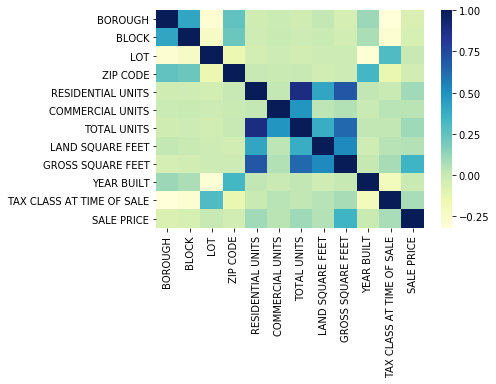

In [10]:

# let's build a correlation matrix and use seaborn to plot the heatmap of these
# correlation matrix
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix,cmap="YlGnBu")
# from the heatmap, dark shades represent positive correlation and light shades represent negative correlation

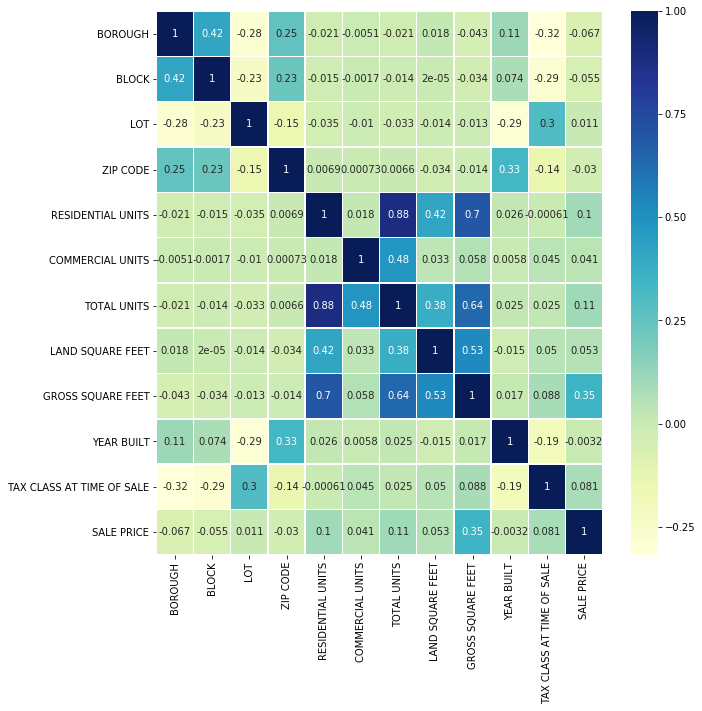

In [11]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="YlGnBu", annot=True, linewidths=.5, ax = ax)

In [12]:

# Highly Coorelated varaibles are :
# 1.Total Units and RESIDENTIAL UNITS
# 2.Gross Square Feet and RESIDENTIAL UNITS
# 3.Total Units and Gross Square Feet
# 4. Gross Square Feet and Land Square Feet

# removing highly correlated indepdent varaible from the dataset
dataset.drop(['RESIDENTIAL UNITS','GROSS SQUARE FEET',],inplace=True, axis=1)
dataset.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,0,5,1633.0,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,3,31,4616.0,1900,2,1.318088e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,1,17,2212.0,1900,2,1.318088e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,0,10,2272.0,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,0,6,2369.0,1900,2,8.000000e+06


In [14]:
#Select the variables to be one-hot encoded
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']
one_hot_features

['BOROUGH',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'TAX CLASS AT TIME OF SALE']

In [15]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(dataset[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79420 entries, 0 to 84547
Data columns (total 60 columns):
BOROUGH                                                                 79420 non-null int64
TAX CLASS AT TIME OF SALE                                               79420 non-null int64
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         79420 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         79420 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       79420 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           79420 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND                      79420 non-null uint8
BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER                          79420 non-null uint8
BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS                  79420 non-null uint8
BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMEN

In [16]:
numeric_data=dataset.select_dtypes(include=[np.number])
numeric_data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,79420.000000,79420.000000,79420.000000,79420.000000,79420.000000,79420.000000,7.942000e+04,79420.000000,79420.000000,7.942000e+04
mean,3.003072,4247.948892,384.243881,10728.378406,0.178356,2.207328,3.834115e+03,1788.115487,1.642067,1.318088e+06
std,1.289991,3572.671258,664.900517,1302.622168,8.623468,18.388689,3.514948e+04,539.215899,0.814103,1.069362e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1327.000000,22.000000,10305.000000,0.000000,1.000000,2.000000e+03,1920.000000,1.000000,3.150000e+05
50%,3.000000,3328.000000,51.000000,11209.000000,0.000000,1.000000,3.107500e+03,1939.000000,1.000000,6.700000e+05
75%,4.000000,6258.000000,1002.000000,11357.000000,0.000000,2.000000,3.834115e+03,1966.000000,2.000000,1.318088e+06
max,5.000000,16322.000000,9106.000000,11694.000000,2261.000000,2261.000000,4.252327e+06,2017.000000,4.000000,2.210000e+09


In [20]:
df = dataset
scaler = StandardScaler()
scaler.fit(df[numeric_data.columns])
scaled = scaler.transform(df[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       df[col] = scaled[:,i]
df

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,-1.552790,07 RENTALS - WALKUP APARTMENTS,2A,-1.079297,-0.568876,-0.552258,-0.020683,0.151870,-6.262195e-02,0.207496,0.439668,4.962723e-01
1,-1.552790,07 RENTALS - WALKUP APARTMENTS,2,-1.077338,-0.538797,-0.552258,0.327207,1.565792,2.224469e-02,0.207496,0.439668,-4.294391e-18
2,-1.552790,07 RENTALS - WALKUP APARTMENTS,2,-1.077338,-0.519245,-0.552258,0.095281,0.804449,-4.614934e-02,0.207496,0.439668,-4.294391e-18
3,-1.552790,07 RENTALS - WALKUP APARTMENTS,2B,-1.076498,-0.546317,-0.552258,-0.020683,0.423778,-4.444234e-02,0.231605,0.439668,2.448377e-01
4,-1.552790,07 RENTALS - WALKUP APARTMENTS,2A,-1.075938,-0.495181,-0.552258,-0.020683,0.206252,-4.168268e-02,0.207496,0.439668,6.248545e-01
5,-1.552790,07 RENTALS - WALKUP APARTMENTS,2,-1.075658,-0.553837,-0.552258,-0.020683,0.967594,-3.565126e-02,0.207496,0.439668,-4.294391e-18
6,-1.552790,07 RENTALS - WALKUP APARTMENTS,2B,-1.075378,-0.529773,-0.552258,-0.020683,0.315015,-5.929329e-02,0.244587,0.439668,1.753162e-01
7,-1.552790,07 RENTALS - WALKUP APARTMENTS,2,-1.075098,-0.550829,-0.552258,0.211244,2.381516,3.780690e-02,0.207496,0.439668,-4.294391e-18
8,-1.552790,08 RENTALS - ELEVATOR APARTMENTS,2,-1.082936,-0.526765,-0.552258,-0.020683,0.695686,-6.543851e-02,0.244587,0.439668,-4.294391e-18
9,-1.552790,08 RENTALS - ELEVATOR APARTMENTS,2,-1.080696,-0.347789,-0.552258,-0.020683,1.185120,1.863153e-02,0.244587,0.439668,1.394664e+00


In [21]:

df.drop(one_hot_features,axis=1,inplace=True)
df = pd.concat([df, one_hot_encoded] ,axis=1)
df.head()

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH,TAX CLASS AT TIME OF SALE,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,-1.079297,-0.568876,-0.552258,-0.020683,0.151870,-0.062622,0.207496,4.962723e-01,1,2,...,0,0,0,0,0,1,0,0,0,0
1,-1.077338,-0.538797,-0.552258,0.327207,1.565792,0.022245,0.207496,-4.294391e-18,1,2,...,0,0,0,0,1,0,0,0,0,0
2,-1.077338,-0.519245,-0.552258,0.095281,0.804449,-0.046149,0.207496,-4.294391e-18,1,2,...,0,0,0,0,1,0,0,0,0,0
3,-1.076498,-0.546317,-0.552258,-0.020683,0.423778,-0.044442,0.231605,2.448377e-01,1,2,...,0,0,0,0,0,0,1,0,0,0
4,-1.075938,-0.495181,-0.552258,-0.020683,0.206252,-0.041683,0.207496,6.248545e-01,1,2,...,0,0,0,0,0,1,0,0,0,0


In [24]:
# classifying data into independent and dependent variable
X = df.drop(['SALE PRICE'],axis = 1).values
y = df['SALE PRICE'].values

In [26]:
# creating test and training set data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train

array([[-0.7495696 , -0.57639644,  0.38739151, ...,  0.        ,
         0.        ,  0.        ],
       [-0.98748831, -0.54631657, -0.55072218, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.25146674,  1.20433229,  0.38892689, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.86656962, -0.54030059,  0.39122995, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88003364, -0.57639644,  0.38432076, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.06682817, -0.57338846,  0.53094901, ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
X_test

array([[-1.01603856,  1.38631554, -0.55072218, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75715562, -0.51022071,  0.48872622, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1724354 , -0.56436449,  0.48258472, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.62053368, -0.48766081,  0.36589627, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84420588, -0.50420474,  0.54016125, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78903611,  0.93662138, -0.54304531, ...,  1.        ,
         0.        ,  0.        ]])

In [28]:

# fitting linear regression to training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:

# calulating the RMSE value to see how well the model predicts
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.7846653020506063

In [30]:

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred_rf))
rmse

0.6850070600773138

AttributeError: 'float' object has no attribute 'head'